# Linear Regression

In [137]:
import pandas as pd

import numpy as np

## Housing Data

You'll fit several linear regression models using scikit-learn. Save each of your models with a different name, because at the end you will use all the models to make predictions.

1\. Fit a linear regression model that predicts the price of a home (**SalePrice**) using square footage (**Gr Liv Area**) as the only feature. Interpret the model coefficients.

(Just use **SalePrice** for now, but we will revise soon.)

In [138]:
df_housing = pd.read_csv("http://dlsun.github.io/pods/data/AmesHousing.txt", sep="\t")
df_housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

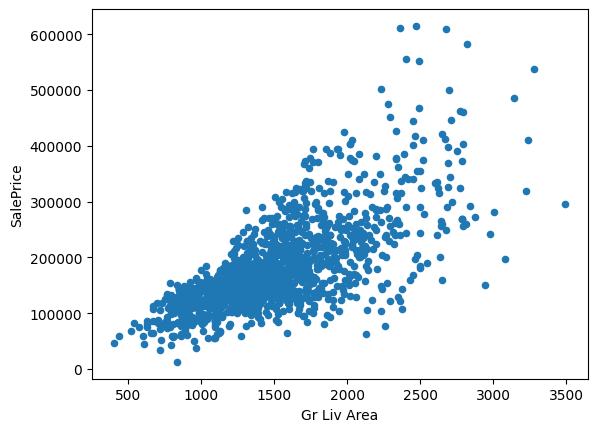

In [139]:
housing_train = df_housing.loc[:1465].copy()
housing_test = df_housing.loc[1466:].copy()

housing_train.plot.scatter(x="Gr Liv Area", y="SalePrice")

In [140]:
from sklearn.linear_model import LinearRegression

X_train = housing_train[["Gr Liv Area"]]
X_test = housing_test[["Gr Liv Area"]]
y_train = housing_train["SalePrice"]

living_price_model = LinearRegression()
living_price_model.fit(X_train, y_train)
living_price_model.predict(X_test)

array([211568.13660464, 228397.13800288, 104516.9888214 , ...,
       118774.8927838 , 167742.61213006, 239149.00000731])

2\. Make a graph of the fitted model (this is possible because there is only one feature in this model). Do this the way we did it in the reading, by creating a grid of `X` values and calling `model.predict()` on those `X` values.

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

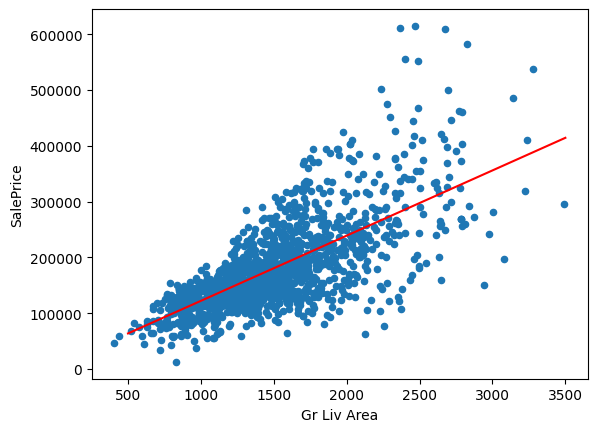

In [141]:
# YOUR CODE HERE

X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new["Gr Liv Area"] = np.linspace(500, 3500, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    living_price_model.predict(X_new), # y values in Series.plot.line()
    index=X_new["Gr Liv Area"]    # x values in Series.plot.line()
)

# plot the data, then the model
housing_train.plot.scatter(x="Gr Liv Area", y="SalePrice")
y_new_.plot.line(color="red")

3\. There is another way to graph a fitted linear regression model: extract the intercept and coefficient and draw a line with that intercept and slope. Verify that this gives the same graph as the previous part.

(This is really just a matter of adding a regression line to a scatterplot. Starting with the `pandas` scatterplot, I think the easiest way to do this is with [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) with two points that are on the ends of the line in the plot area. But you can also try Plotly or Altair. If you find a good solution; share with the class!)

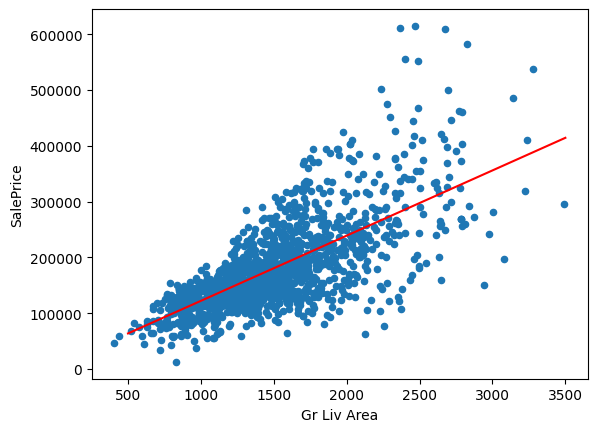

In [142]:
# YOUR CODE HERE

import matplotlib.pyplot as plt

coef = living_price_model.coef_[0]
intercept = living_price_model.intercept_

housing_train.plot.scatter(x="Gr Liv Area", y="SalePrice")
plt.plot(X_new["Gr Liv Area"], coef * X_new["Gr Liv Area"] + intercept, color="red")

4\. Explain why we might consider log of **SalePrice** rather than **SalePrice**. Then fit a linear regression model that predicts the log price of a home using square footage (**Gr Liv Area**) as the only feature. Interpret the model coefficients.

We might consider the log of SalePrice rather than SalePrice because the relationship between these could not be truly linear. The Prices seem to deviate from the line when the Gr Liv Area is higher.

In [143]:
# YOUR CODE HERE
housing_train["log(SalePrice)"] = np.log(housing_train["SalePrice"])

log_price_model = LinearRegression()
log_price_model.fit(housing_train[["Gr Liv Area"]], housing_train["log(SalePrice)"])

X_new = pd.DataFrame()
X_new["Gr Liv Area"] = np.linspace(500, 3500, num=200)
y_new_ = pd.Series(
    log_price_model.predict(X_new),
    index=X_new["Gr Liv Area"]
)

5\. Make a graph of the fitted model; from the previous part. Does it seem to be an improvement over the model based on **SalePrice**?

<Axes: xlabel='Gr Liv Area', ylabel='log(SalePrice)'>

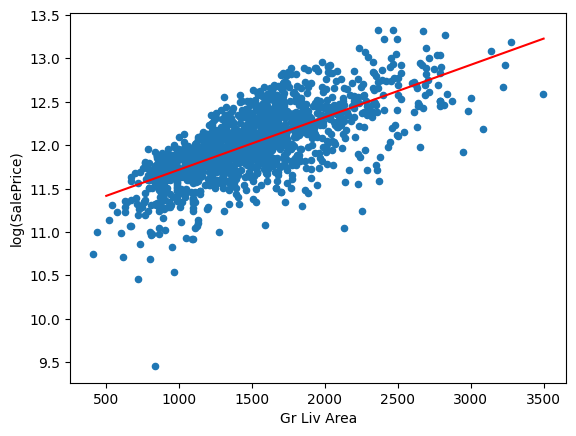

In [144]:
# YOUR CODE HERE

housing_train.plot.scatter(x="Gr Liv Area", y="log(SalePrice)")
y_new_.plot.line(color="red")

Improvement from the last model.

6\. Fit a linear regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), and number of half bathrooms (**Half Bath**). Interpret the model coefficients.

In [145]:
# YOUR CODE HERE

multi_quant_model = LinearRegression()
multi_quant_model.fit(
    X=housing_train[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath"]],
    y=housing_train["SalePrice"]
)

y_new = multi_quant_model.predict(
    X=housing_test[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath"]]
)

y_new

array([218653.33614397, 203670.42593117, 145408.23678025, ...,
        93121.58795343, 183807.06677999, 250386.56206377])

In [146]:
predictions_df = pd.DataFrame({'PredictedSalePrice': y_new})
predictions_df.index = housing_test.index

housing_test = pd.concat([housing_test, predictions_df], axis=1)

housing_test

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,PredictedSalePrice
1466,1467,907265100,60,RL,96.0,11690,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,6,2008,WD,Normal,207000,218653.336144
1467,1468,907285080,60,RL,70.0,8750,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,7,2008,WD,Normal,210000,203670.425931
1468,1469,907290150,120,RM,37.0,4435,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,3,2008,WD,Normal,136500,145408.236780
1469,1470,907290250,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,2,2008,WD,Normal,145000,145408.236780
1470,1471,907295020,20,RL,75.0,13125,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2008,WD,Normal,208900,184761.579695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500,97558.861069
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000,118323.672615
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000,93121.587953
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2006,WD,Normal,170000,183807.066780


In [147]:
housing_test["SalePrice"]

1466    207000
1467    210000
1468    136500
1469    145000
1470    208900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 1464, dtype: int64

In [148]:
housing_test["PredictedSalePrice"]

1466    218653.336144
1467    203670.425931
1468    145408.236780
1469    145408.236780
1470    184761.579695
            ...      
2925     97558.861069
2926    118323.672615
2927     93121.587953
2928    183807.066780
2929    250386.562064
Name: PredictedSalePrice, Length: 1464, dtype: float64

7\. For the model in the previous part, make a scatterplot of actual price versus predicted price. Color the points by Neighborhood.

In [149]:
# YOUR CODE HERE

import plotly.express as px

fig = px.scatter(
    housing_test,
    x="SalePrice",
    y="PredictedSalePrice",
    color="Neighborhood",
    hover_data=["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath"]
)

fig.show()

8\. Fit a linear regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), number of half bathrooms (**Half Bath**), and **Neighborhood**.

In [161]:
# YOUR CODE HERE
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

ct = make_column_transformer(
    (OneHotEncoder(), ["Neighborhood"]),
    remainder="passthrough"
)

ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['Neighborhood'])])

In [163]:
pipeline = make_pipeline(
    ct,
    LinearRegression()
)

pipeline.fit(
    X=df_housing[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath", "Neighborhood"]],
    y=df_housing["SalePrice"]
)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Neighborhood'])])),
                ('linearregression', LinearRegression())])

9\. For the model in the previous part, make a scatterplot of actual price versus predicted price. Color the points by Neighborhood. How does adding Neighborhood change the predictions?

In [164]:
df_housing[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath", "Neighborhood"]]

,Gr Liv Area,Bedroom AbvGr,Full Bath,Half Bath,Neighborhood
0,1656,3,1,0,NAmes
1,896,2,1,0,NAmes
2,1329,3,1,1,NAmes
3,2110,3,2,1,NAmes
4,1629,3,2,1,Gilbert
...,...,...,...,...,...
2925,1003,3,1,0,Mitchel
2926,902,2,1,0,Mitchel
2927,970,3,1,0,Mitchel
2928,1389,2,1,0,Mitchel


In [168]:
# YOUR CODE HERE

# pipeline.predict(
#     X=df_housing[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath", "Neighborhood"]]
# )
df_housing["PredictedSalePrice"] = pipeline.predict(
    X=df_housing[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath", "Neighborhood"]]
)

df_housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,PredictedSalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,180575.938756
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,122057.076508
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,142150.523574
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,215697.901700
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,191435.843199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500,130431.548270
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000,134798.263957
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000,127282.498085
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2006,WD,Normal,170000,181270.610626


In [170]:
fig = px.scatter(
    df_housing,
    x="SalePrice",
    y="PredictedSalePrice",
    color="Neighborhood",
    hover_data=["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath"]
)

fig.show()

10\. Use each of the models that you fit --- there should be four --- to predict the price of a home that is 1500 square feet, with 3 bedrooms, 2 full baths, 1 half bath in the NAmes neighborhood.

In [171]:
# YOUR CODE HERE

x_test = pd.Series()
x_test["Gr Liv Area"] = 1500
x_test["Bedroom AbvGr"] = 3
x_test["Full Bath"] = 2
x_test["Half Bath"] = 1
x_test["Neighborhood"] = "NAmes"

x_test = pd.DataFrame([x_test])

In [179]:
living_price_model.predict(x_test[['Gr Liv Area']])[0]

180714.96737453557

In [178]:
np.exp(log_price_model.predict(x_test[['Gr Liv Area']])[0])

166179.58554653535

In [180]:
multi_quant_model.predict(x_test[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath"]])[0]

183155.15121674322

In [181]:
pipeline.predict(x_test)[0]

157488.18615977024

11\. Compare the predictions from the previous part. Which one is best?

In [185]:
# YOUR CODE HERE